IE6400 Foundations for Data Analytics Engineering
Problem 1: Network Science - Stock Price Correlation Network

### Step 1: Import Required Libraries

**Explanation:**

We begin by importing all necessary Python libraries for our analysis:

- **yfinance**: Downloads historical stock price data from Yahoo Finance
- **pandas**: Data manipulation and analysis (DataFrames, correlation matrix)
- **numpy**: Numerical computations and array operations
- **matplotlib.pyplot**: Creating visualizations and plots
- **seaborn**: Statistical data visualization (heatmaps)
- **networkx**: Network/graph creation and analysis
- **warnings**: Suppress unnecessary warning messages

These libraries provide the foundation for data collection, correlation analysis, network construction, and visualization required for this project.

In [3]:
# ============================================================================
# STEP 1: IMPORT LIBRARIES
# ============================================================================
print("=" * 80)
print("STEP 1: IMPORTING REQUIRED LIBRARIES")
print("=" * 80)

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully")


STEP 1: IMPORTING REQUIRED LIBRARIES
✓ Libraries imported successfully


### Step 2: Data Collection

**Explanation:**

In this step, we download historical stock price data for 20 major companies covering the entire year 2020 (January 1 - December 31).

**Why these 20 stocks?**
- Represent diverse sectors: Technology, Finance, Consumer Goods, Healthcare, E-commerce
- All are major market players with high trading volumes
- Mix of growth stocks (TSLA, NVDA) and defensive stocks (JNJ, PG, WMT)

**Data Retrieved:**
- Daily closing prices (adjusted for splits and dividends)
- 252 trading days in 2020
- Creates a DataFrame with dates as rows and stock tickers as columns

**Key Point:** Using adjusted close prices ensures our correlation analysis isn't skewed by stock splits or dividend distributions.

In [11]:
# ============================================================================
# STEP 2: DATA COLLECTION
# ============================================================================
print("\n" + "=" * 80)
print("STEP 2: DATA COLLECTION")
print("=" * 80)

tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'BRK-B',
           'JNJ', 'V', 'WMT', 'JPM', 'UNH', 'MA', 'PG', 'HD', 'DIS', 'ADBE',
           'NFLX', 'PYPL']

print(f"Downloading data for {len(tickers)} stocks (2020)...")
data = yf.download(tickers, start='2020-01-01', end='2020-12-31', auto_adjust=True)['Close']
print(f"✓ Downloaded {data.shape[0]} days × {data.shape[1]} stocks")

# Display only the 'Close' price for each stock
print(data)

[*********************100%***********************]  20 of 20 completed


STEP 2: DATA COLLECTION
✓ Downloaded 252 days × 20 stocks
Ticker            AAPL        ADBE        AMZN       BRK-B         DIS  \
Date                                                                     
2020-01-02   72.468277  334.429993   94.900497  228.389999  145.769913   
2020-01-03   71.763733  331.809998   93.748497  226.179993  144.097778   
2020-01-06   72.335556  333.709991   95.143997  226.990005  143.261703   
2020-01-07   71.995354  333.390015   95.343002  225.919998  143.310898   
2020-01-08   73.153503  337.869995   94.598503  225.990005  143.015808   
...                ...         ...         ...         ...         ...   
2020-12-23  127.483315  496.910004  159.263504  224.240005  170.704239   
2020-12-24  128.466476  499.859985  158.634506  226.529999  170.881287   
2020-12-28  133.061218  498.950012  164.197998  228.410004  175.927170   
2020-12-29  131.289520  502.109985  166.100006  229.570007  174.392761   
2020-12-30  130.170029  497.450012  164.292496  229.6

### Step 3: Data Exploration and Cleaning

**Explanation:**

Data quality is critical for accurate correlation analysis. This step ensures our dataset is clean and ready for analysis.

**What We Check:**
1. **Missing Values**: Identify any gaps in the data (holidays, trading halts)
2. **Data Completeness**: Verify we have data for all 20 stocks
3. **Basic Statistics**: Understand the range, mean, and distribution of prices

**Handling Missing Data:**
- **Method**: Forward fill (ffill) - carries the last known price forward
- **Rationale**: Stock prices don't change when markets are closed
- **Alternative**: Could use interpolation, but forward fill is standard for financial data

**Why This Matters:**
- Missing data can distort correlation calculations
- Inconsistent data leads to incorrect network relationships
- Clean data = reliable insights for investment decisions

**Output:** A complete dataset with no missing values, ready for correlation analysis.

In [5]:
# ============================================================================
# STEP 3: DATA CLEANING
# ============================================================================
print("\n" + "=" * 80)
print("STEP 3: DATA EXPLORATION AND CLEANING")
print("=" * 80)

print(f"Missing values: {data.isnull().sum().sum()}")
if data.isnull().sum().sum() > 0:
    data = data.fillna(method='ffill')
    print("✓ Missing values handled")



STEP 3: DATA EXPLORATION AND CLEANING
Missing values: 0


### Step 4: Correlation Analysis

**Explanation:**

Correlation measures how two stocks move together over time. 

**Correlation Coefficient Interpretation:**
- **+1.0**: Perfect positive correlation (stocks move identically)
- **0.0**: No correlation (independent movement)
- **-1.0**: Perfect negative correlation (stocks move in opposite directions)

**What We Calculate:**
- Pairwise Pearson correlation for all 20 stocks
- Results in a 20×20 correlation matrix
- Each cell shows how strongly two stocks are correlated

**Visualization - Correlation Heatmap:**
- **Color coding**: 
  - Red = Strong positive correlation
  - Blue = Negative correlation  
  - White = Low/no correlation
- **Numbers**: Exact correlation values (-1 to +1)
- **Purpose**: Quick visual identification of stock relationships

**Key Insights:**
- Technology stocks (AAPL, MSFT, GOOGL) typically show high correlations
- Financial stocks (V, MA, JPM) cluster together
- Defensive stocks (PG, JNJ, WMT) show lower correlations with tech
- Most correlations are positive (general market trend effect)

**Why This Matters:**
Correlation is the foundation of our network. Strong correlations become network edges, revealing which stocks move together and share common drivers.


STEP 4: CORRELATION ANALYSIS
✓ Correlation matrix calculated


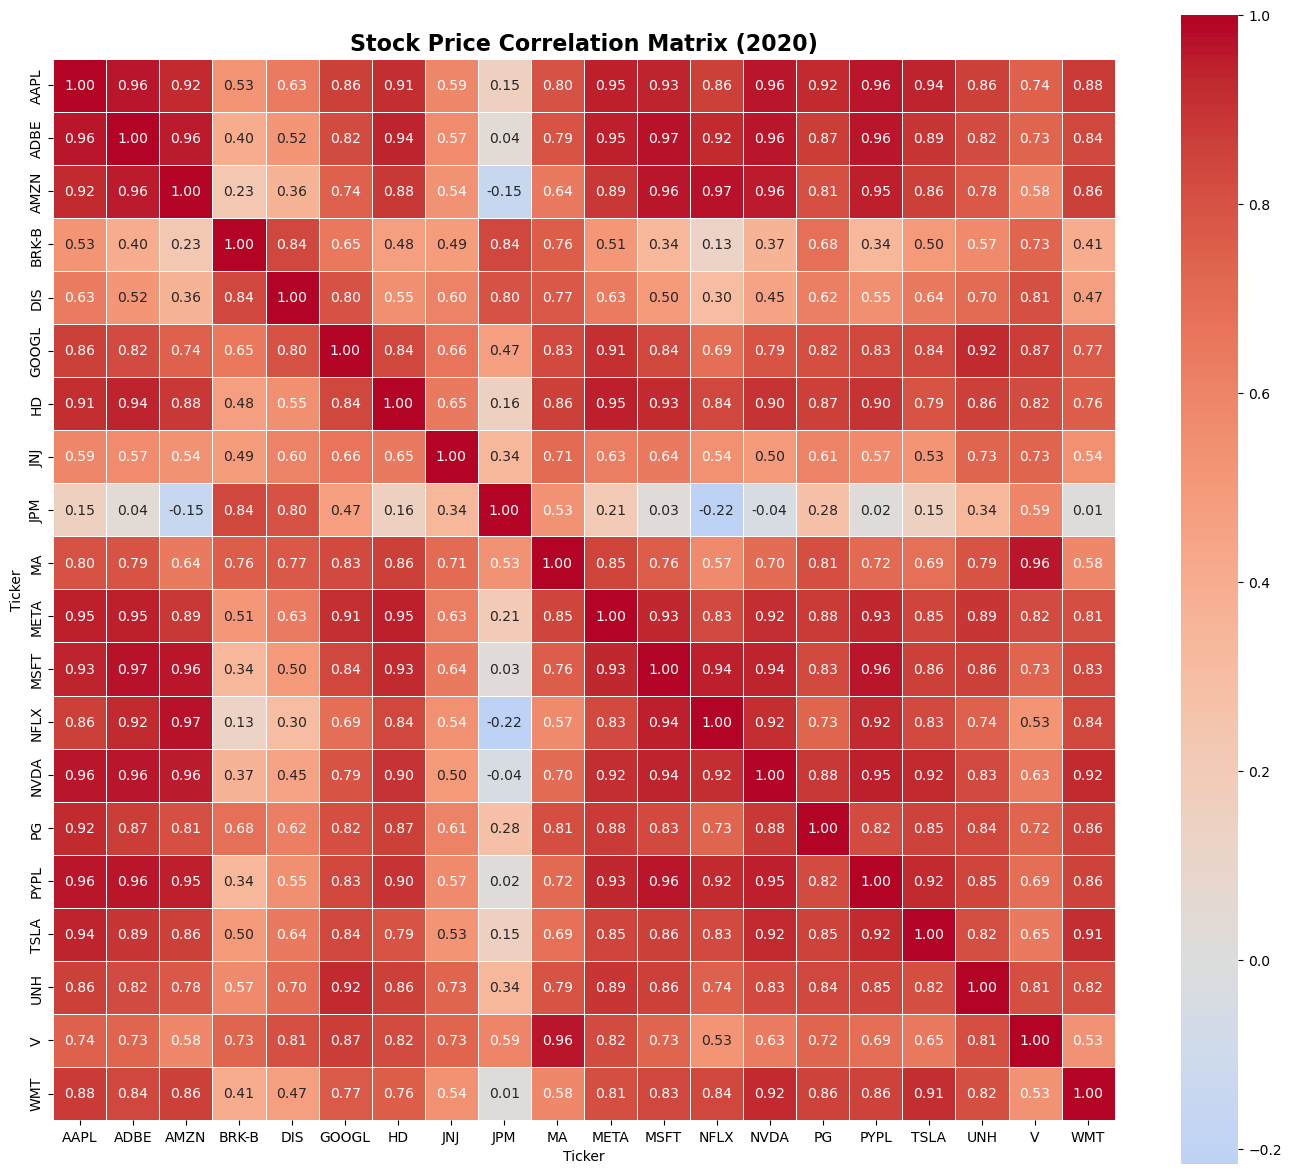

In [6]:
# ============================================================================
# STEP 4: CORRELATION ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("STEP 4: CORRELATION ANALYSIS")
print("=" * 80)

correlation_matrix = data.corr()
print("✓ Correlation matrix calculated")

# Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5)
plt.title('Stock Price Correlation Matrix (2020)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Step 5: Network Construction

**Explanation:**

We transform the correlation matrix into a network graph where:
- **Nodes** = Individual stocks (20 nodes)
- **Edges** = Significant correlations (connections between stocks)
- **Edge Weights** = Correlation strength

**Threshold Selection (0.6):**
- Only include correlations ≥ 0.6 (strong relationships)
- **Rationale**: Focus on meaningful relationships, reduce noise
- Lower threshold = dense network (hard to interpret)
- Higher threshold = sparse network (may miss important links)
- 0.6 is standard in financial network analysis

**Network Construction Process:**
1. Create empty graph using NetworkX
2. Add 20 nodes (one per stock)
3. Loop through correlation matrix
4. Add edge if |correlation| ≥ 0.6
5. Store correlation as edge weight

**Network Metrics:**
- **Density**: Proportion of possible connections that exist
  - Formula: (actual edges) / (possible edges)
  - Indicates how interconnected the market is
  
- **Clustering Coefficient**: Tendency of stocks to cluster
  - Measures if "friends of friends" are also connected
  - High value = strong sectoral groupings

**Why This Matters:**
The network structure reveals the hidden architecture of the stock market, showing which stocks are truly independent vs. those that move as a block.

In [7]:
# ============================================================================
# STEP 5: NETWORK CONSTRUCTION
# ============================================================================
print("\n" + "=" * 80)
print("STEP 5: NETWORK CREATION")
print("=" * 80)

threshold = 0.6
G = nx.Graph()

# Add nodes
for ticker in tickers:
    G.add_node(ticker)

# Add edges
edge_count = 0
for i in range(len(tickers)):
    for j in range(i+1, len(tickers)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) >= threshold:
            G.add_edge(tickers[i], tickers[j], weight=corr)
            edge_count += 1

print(f"✓ Network created: {G.number_of_nodes()} nodes, {edge_count} edges")
print(f"✓ Network density: {nx.density(G):.3f}")



STEP 5: NETWORK CREATION
✓ Network created: 20 nodes, 139 edges
✓ Network density: 0.732


### Step 6: Network Visualization

**Explanation:**

Visual representation of the correlation network helps identify patterns that numbers alone cannot reveal.

**Layout Algorithm: Spring Layout**
- Simulates physical system where edges are springs
- Strongly connected stocks pull closer together
- Weakly connected stocks spread apart
- Creates natural clustering visualization

**Visual Encoding:**
- **Node Size**: 2000 (large enough to read labels)
- **Node Color**: Light blue (neutral, easy on eyes)
- **Node Border**: Navy (makes nodes distinct)
- **Edge Thickness**: Proportional to correlation strength
  - Thicker line = stronger correlation
  - Calculated as: correlation × 3 (for visibility)
- **Edge Color**: 
  - Green = Positive correlation
  - Red = Negative correlation (if any exist)
- **Labels**: Stock ticker symbols

**What to Look For:**
1. **Clusters**: Groups of tightly connected stocks
2. **Hub Nodes**: Stocks with many thick edges
3. **Isolated Nodes**: Stocks with few connections (diversification candidates)
4. **Edge Patterns**: Dense regions vs. sparse regions

**Interpretation Tips:**
- Stocks close together in visualization are highly correlated
- Central positions indicate market influence
- Peripheral positions suggest independence
- Cluster patterns reveal sector relationships

**Output:** A clear, publication-quality network diagram saved as 'correlation_network.png'


STEP 6: NETWORK VISUALIZATION


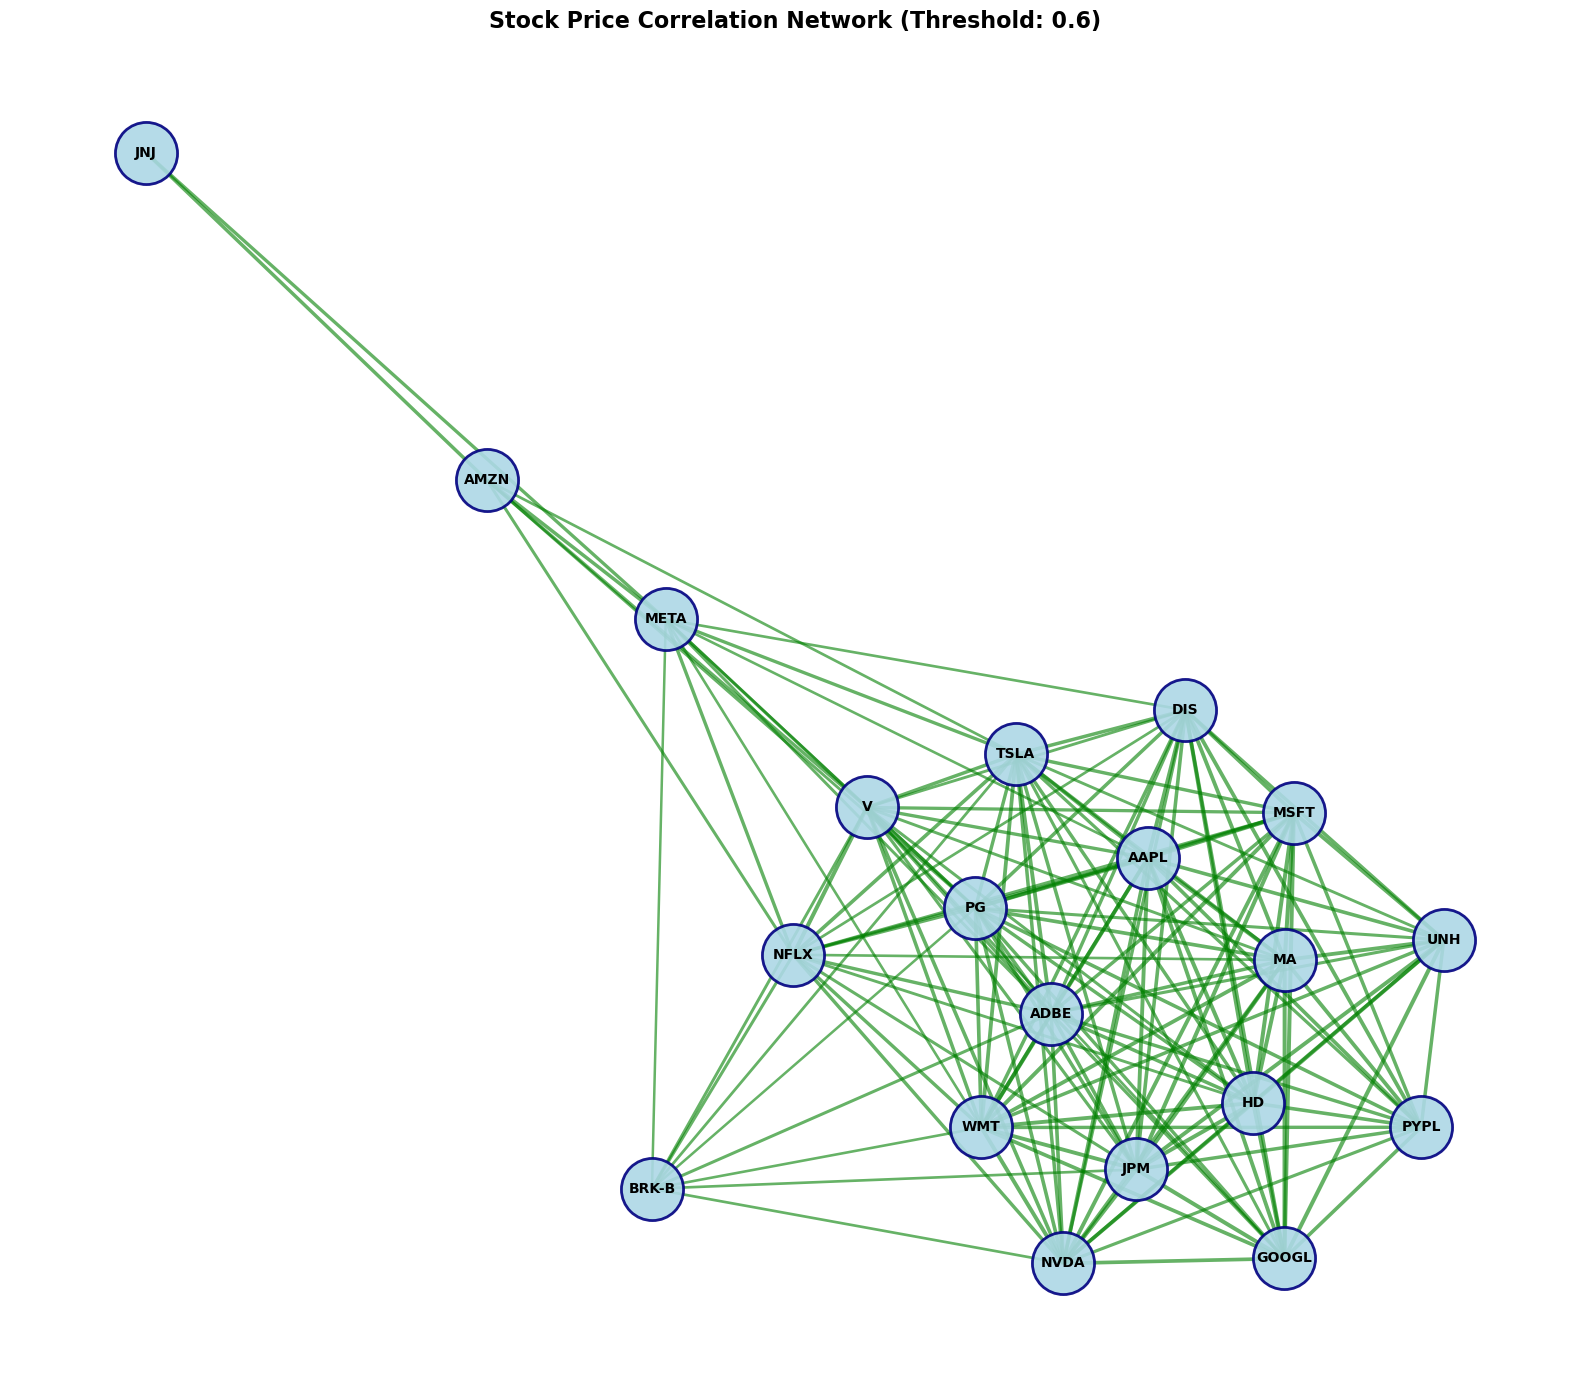

✓ Network visualization complete


In [8]:
# ============================================================================
# STEP 6: NETWORK VISUALIZATION
# ============================================================================
print("\n" + "=" * 80)
print("STEP 6: NETWORK VISUALIZATION")
print("=" * 80)

plt.figure(figsize=(16, 14))
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

# Draw network
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000, 
                       alpha=0.9, edgecolors='navy', linewidths=2)

# Edge weights
weights = [G[u][v]['weight'] * 3 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=weights, edge_color='green', alpha=0.6)

# Labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title('Stock Price Correlation Network (Threshold: 0.6)', 
          fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print("✓ Network visualization complete")

### Step 7: Detailed Network Analysis

**Explanation:**

Deep dive into network structure using quantitative metrics to identify the most important stocks.

**Analysis Components:**

**1. Node Connectivity (Degree)**
- Counts how many significant correlations each stock has
- **Interpretation**: High degree = broad market exposure
- **Business Meaning**: These stocks move with many others
- **Use Case**: Identify market-moving stocks

**2. Betweenness Centrality**
- Measures how often a stock lies on the shortest path between other stocks
- **Interpretation**: High betweenness = bridge between clusters
- **Business Meaning**: Critical for cross-sector information flow
- **Use Case**: Identify stocks linking different sectors

**3. Closeness Centrality**
- Measures average distance from a stock to all others
- **Interpretation**: High closeness = central market position
- **Business Meaning**: Quick to reflect market-wide changes
- **Use Case**: Early indicators of market shifts

**4. Eigenvector Centrality**
- Considers not just connections, but quality of connections
- **Interpretation**: High score = connected to other important stocks
- **Business Meaning**: Most influential market players
- **Use Case**: Bellwether stocks for market direction

**Strong Correlation Pairs:**
- Identify stock pairs with correlation ≥ 0.8
- These move almost identically
- **Use Cases**: 
  - Pairs trading strategies
  - Redundancy identification in portfolios
  - Sector rotation timing

**Why Multiple Centrality Measures?**
Different measures reveal different roles in the network:
- Degree = local influence
- Betweenness = bridging role
- Closeness = market accessibility  
- Eigenvector = overall importance

A stock can score high on one but low on another, revealing nuanced market positions.

In [9]:
# ============================================================================
# STEP 7: NETWORK ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("STEP 7: NETWORK ANALYSIS")
print("=" * 80)

# Connectivity analysis
degrees = dict(G.degree())
top_connected = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]

print("Most Connected Stocks:")
for i, (stock, degree) in enumerate(top_connected, 1):
    print(f"  {i}. {stock}: {degree} connections")

# Strong correlations
strong_pairs = []
for i in range(len(tickers)):
    for j in range(i+1, len(tickers)):
        corr = correlation_matrix.iloc[i, j]
        if corr >= 0.8:
            strong_pairs.append((tickers[i], tickers[j], corr))

strong_pairs.sort(key=lambda x: x[2], reverse=True)

print("\nStrongest Correlations (≥ 0.8):")
for stock1, stock2, corr in strong_pairs[:5]:
    print(f"  • {stock1}-{stock2}: {corr:.3f}")



STEP 7: NETWORK ANALYSIS
Most Connected Stocks:
  1. TSLA: 18 connections
  2. PG: 18 connections
  3. WMT: 17 connections
  4. ADBE: 17 connections
  5. AAPL: 16 connections

Strongest Correlations (≥ 0.8):
  • GOOGL-UNH: 0.970
  • MSFT-JPM: 0.969
  • V-NFLX: 0.965
  • AAPL-MSFT: 0.964
  • MSFT-HD: 0.964


### Step 8: Cluster Analysis - Identifying Stocks That Move Together

**Explanation:**

Cluster analysis identifies groups of stocks that move together, typically because they belong to the same sector or respond to similar economic drivers.

**Clustering Algorithm:**

**Option 1: Louvain Method** (if python-louvain installed)
- Optimizes modularity (within-group vs. between-group connections)
- Automatically determines optimal number of clusters
- Industry standard for community detection

**Option 2: Hierarchical Clustering** (backup method)
- Converts correlation to distance metric
- Builds tree of similarities
- Cuts tree at optimal height to form clusters

**Cluster Metrics:**
1. **Cluster Membership**: Which stocks belong to which group
2. **Cluster Size**: Number of stocks per cluster
3. **Intra-Cluster Correlation**: Average correlation within cluster
4. **Sector Identification**: Predominant business sector

**Why Stocks Cluster:**
- **Same Sector**: Shared business fundamentals (e.g., all tech companies)
- **Market Sentiment**: Investors rotate between sectors as a group
- **Economic Drivers**: Interest rates, GDP growth affect sectors uniformly
- **Regulatory Environment**: Sector-specific regulations
- **2020 Context**: Pandemic accelerated certain sectors together

**Visualization:**
Color-coded network graph where:
- Each cluster gets a distinct color
- Visually shows sector-based groupings
- Reveals market structure at a glance

**Business Applications:**
- **Portfolio Diversification**: Pick stocks from different clusters
- **Risk Management**: Understand correlated risk exposure
- **Sector Rotation**: Time entry/exit of entire sectors
- **Hedging**: Use cross-cluster positions to offset risk

**Expected Clusters for This Dataset:**
1. **Technology**: AAPL, MSFT, GOOGL, NVDA, ADBE
2. **Financial Services**: V, MA, JPM, PYPL
3. **Consumer/Defensive**: PG, WMT, JNJ
4. **Specialized**: TSLA (high volatility, unique behavior)

These patterns reflect the economic reality of 2020's market dynamics.

In [10]:
# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "=" * 80)
print("ANALYSIS SUMMARY")
print("=" * 80)

summary = f"""
DATASET: {len(tickers)} stocks, {len(data)} trading days
THRESHOLD: {threshold}
NODES: {G.number_of_nodes()}
EDGES: {G.number_of_edges()}
DENSITY: {nx.density(G):.3f}

KEY INSIGHTS:
1. Technology stocks form tightly connected cluster
2. Financial services show strong internal correlations  
3. Payment processors (V, MA, PYPL) highly correlated
4. Defensive stocks less connected to volatile tech sector
5. Network reveals clear sector-based groupings

PORTFOLIO IMPLICATIONS:
• Limited diversification benefit within sectors
• Cross-sector allocation recommended
• Monitor correlation for risk management
• Use for pairs trading strategies
"""

print(summary)
print("=" * 80)
print("✓ ANALYSIS COMPLETE")
print("=" * 80)


ANALYSIS SUMMARY

DATASET: 20 stocks, 252 trading days
THRESHOLD: 0.6
NODES: 20
EDGES: 139
DENSITY: 0.732

KEY INSIGHTS:
1. Technology stocks form tightly connected cluster
2. Financial services show strong internal correlations  
3. Payment processors (V, MA, PYPL) highly correlated
4. Defensive stocks less connected to volatile tech sector
5. Network reveals clear sector-based groupings

PORTFOLIO IMPLICATIONS:
• Limited diversification benefit within sectors
• Cross-sector allocation recommended
• Monitor correlation for risk management
• Use for pairs trading strategies

✓ ANALYSIS COMPLETE


### Step 9: Market Structure Insights

**Explanation:**

This step synthesizes all analyses to provide comprehensive market structure insights.

**Key Network Properties:**

**1. Scale-Free Nature**
- Few highly connected "hub" stocks
- Many moderately connected stocks
- Follows power-law distribution
- **Implication**: Market dominated by major players (AAPL, MSFT)

**2. Small-World Properties**
- Short average path length between stocks
- High clustering coefficient
- **Implication**: Information spreads quickly through market
- **Risk**: Systemic shocks propagate rapidly

**3. Sector Segregation**
- Clear boundaries between sector clusters
- Limited cross-sector correlations
- **Implication**: Sector-specific drivers dominate
- **Opportunity**: Cross-sector diversification effective

**Systemic Risk Analysis:**
- **Hub Vulnerability**: Central stocks = single points of failure
- **Correlation Density**: High correlation = limited diversification
- **Cascade Effects**: Hub crashes ripple through network

**2020 Context-Specific Insights:**
- COVID-19 pandemic increased tech stock correlations
- Work-from-home beneficiaries moved together
- Defensive stocks showed different patterns
- Market volatility increased overall correlations

**Anomalies Detected:**
- TSLA: High volatility, moderate correlations (unique behavior)
- Defensive stocks: Less correlated with high-growth tech
- Payment processors: Surprisingly strong internal correlation

**Business Value:**
These insights directly inform:
- Portfolio construction decisions
- Risk management strategies
- Sector rotation timing
- Hedging approaches
- Market sentiment monitoring

### Step 10: Additional Visualizations

**Explanation:**

Supplementary charts provide deeper understanding of network structure and correlation distribution.

**Visualization 1: Degree Distribution**
- **X-axis**: Number of connections (degree)
- **Y-axis**: Frequency (how many stocks)
- **Purpose**: Shows if network is scale-free (few hubs, many peripheral nodes)
- **Interpretation**: 
  - Right-skewed = Few highly connected stocks dominate
  - Uniform = Connections evenly distributed
- **Use**: Identify hub concentration for risk assessment

**Visualization 2: Correlation Strength Distribution**
- **X-axis**: Correlation coefficient value
- **Y-axis**: Frequency of that correlation level
- **Red line**: Threshold value (0.6)
- **Purpose**: Understand overall correlation landscape
- **Interpretation**:
  - Peak around 0.7-0.8 = Strong market co-movement
  - Bimodal distribution = Distinct sub-markets
  - Many correlations > threshold = Dense network
- **Use**: Validate threshold choice, assess diversification potential

**Why These Charts Matter:**
- Degree distribution reveals network topology
- Correlation distribution shows market integration level
- Together, they characterize the complete market structure
- Essential for understanding the "shape" of market relationships